In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("cleaned_cardio.csv")
df.head()

df = df.iloc[:-60000] #take less data, around 10k, 70/30 test-train split
df.shape

(10000, 13)

In [ ]:
df.drop('id', axis=1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [ ]:
feature_columns = ['age', 'cholesterol', 'weight']
X = df[feature_columns]
y = df['cardio']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
pipeline_logistic = make_pipeline(StandardScaler(), LogisticRegression())

pipeline_logistic.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
score = pipeline_logistic.score(X_test, y_test)
print(f"\nLogistic Regression model accuracy with standardized data in a pipeline: {score*100:.2f}%")


Logistic Regression model accuracy with standardized data in a pipeline: 63.73%


In [ ]:
pred = pipeline_logistic.predict(X_test)
class_report = classification_report(y_test, pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1478
           1       0.66      0.60      0.63      1522

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [ ]:
t = {
    'age': [18450],
    'cholesterol': [3],
    'weight': [59]
}

test_data = pd.DataFrame(t)

pred = pipeline_logistic.predict(test_data)
pred

array([1])

In [ ]:
age = int(input("Enter your age: "))
cholesterol = input("Enter your cholesterol level\n[1] Low\n[2]Average\n[3]High\n> ")
weight = input("Enter your weight (kg): ")

t = {
    'age': [age * 365],
    'cholesterol': [cholesterol],
    'weight': [weight]
}

test_data = pd.DataFrame(t)

pred = pipeline_logistic.predict(test_data)

if(pred[0] == 1):
    print("You have high probability of having a cardio disease")
else:
    print("You have low probability of having a cardio disease")

Enter your age: 65
Enter your cholesterol level
[1] Low
[2]Average
[3]High
> 3
Enter your weight (kg): 87
You have high probability of having a cardio disease


In [ ]:
pipeline_linear = make_pipeline(StandardScaler(), LinearRegression())

pipeline_linear.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
score = pipeline_linear.score(X_test, y_test)
print(f"\nLinear Regression model accuracy with standardized data in a pipeline: {score*100:.2f}%")


Linear Regression model accuracy with standardized data in a pipeline: 11.86%


In [ ]:
pred = pipeline_linear.predict(X_test)

In [ ]:
pred

array([0.34967297, 0.52163812, 0.46996548, ..., 0.35743536, 0.35992932,
       0.60533639])

Model Accuracy: 0.7274

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       988
           1       0.76      0.66      0.71       971

    accuracy                           0.73      1959
   macro avg       0.73      0.73      0.73      1959
weighted avg       0.73      0.73      0.73      1959



/tmp/ipython-input-1244741570.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')


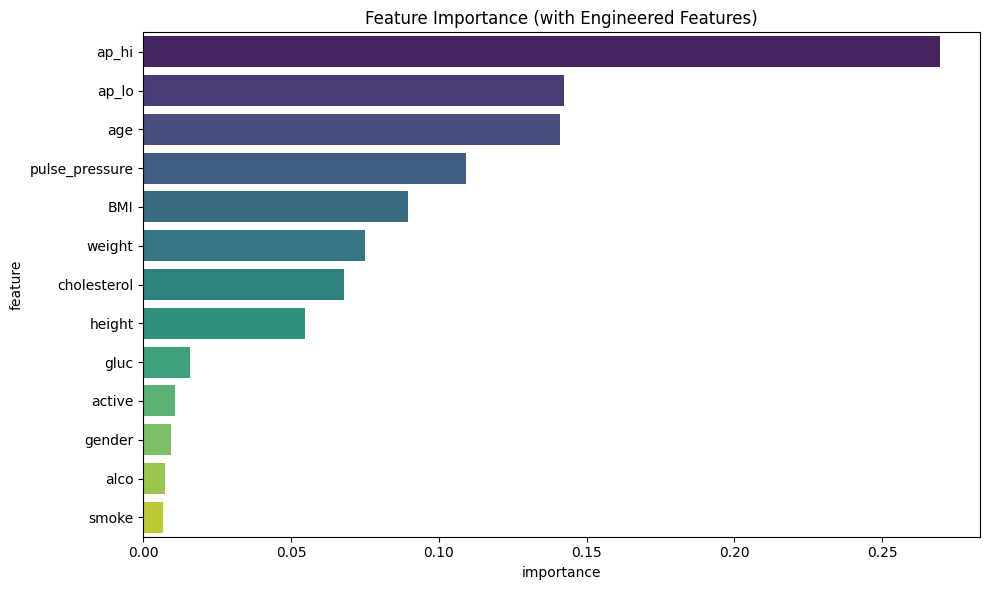

In [ ]:
mask = (df['ap_hi'] >= 60) & (df['ap_hi'] <= 240) & \
       (df['ap_lo'] >= 40) & (df['ap_lo'] <= 160) & \
       (df['ap_hi'] > df['ap_lo'])
df_clean = df[mask].copy()

df_clean['BMI'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)

df_clean['pulse_pressure'] = df_clean['ap_hi'] - df_clean['ap_lo']

X = df_clean.drop(['cardio', 'id'], axis=1)
y = df_clean['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (with Engineered Features)')
plt.tight_layout()
plt.show()